# Interpolate

## Interpolate 1d

In [13]:
from smpl import plot
from smpl import stat
from smpl import data
from smpl import interpolate
import numpy as np

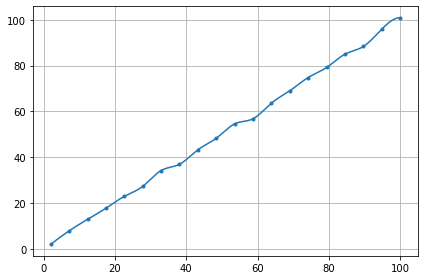

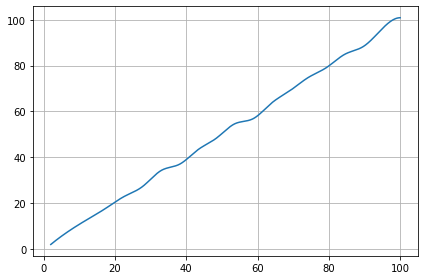

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

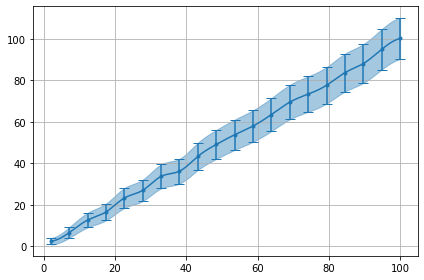

array(50.60126081593718+/-7.112685988008629, dtype=object)

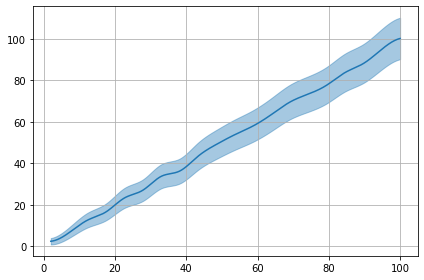

In [6]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
f=plot.data(x,y,interpolate=True,sigmas=1,also_data=False)
f(50)

## Interpolate 2d

[  0. -25.   0.  75. 200. -25. -50. -25.  50. 175.   0. -25.   0.  75.
 200.  75.  50.  75. 150. 275. 200. 175. 200. 275. 400.]
[ 6.74216420e-15 -2.50000000e+01  3.55271368e-15  7.50000000e+01
  2.00000000e+02 -2.50000000e+01 -5.00000000e+01 -2.50000000e+01
  5.00000000e+01  1.75000000e+02  1.42108547e-14 -2.50000000e+01
  1.95399252e-14  7.50000000e+01  2.00000000e+02  7.50000000e+01
  5.00000000e+01  7.50000000e+01  1.50000000e+02  2.75000000e+02
  2.00000000e+02  1.75000000e+02  2.00000000e+02  2.75000000e+02
  4.00000000e+02]


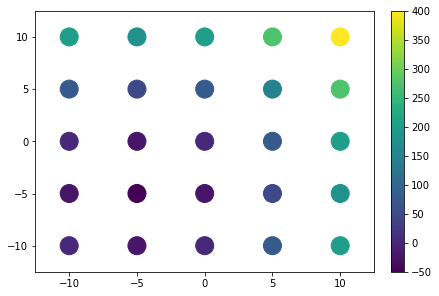

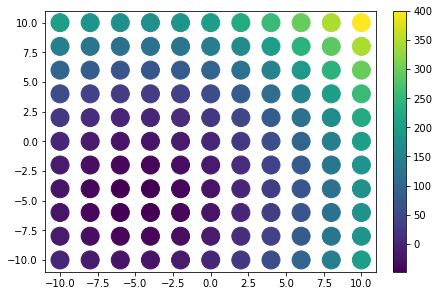

In [18]:
xvalues = np.linspace(-10,10,5)
yvalues = np.linspace(-10,10,5)
xx, yy = data.flatmesh(xvalues, yvalues)
zz=xx**2+yy**2+10*xx+10*yy
print(zz)
plot.plot2d(xx,yy,zz,fill_missing=False,style='scatter',logz=False)
f=interpolate.interpolate(xx,yy,zz)
print(f(xx,yy))
xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-10,10,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f(xx,yy),fill_missing=False,style='scatter',logz=False)

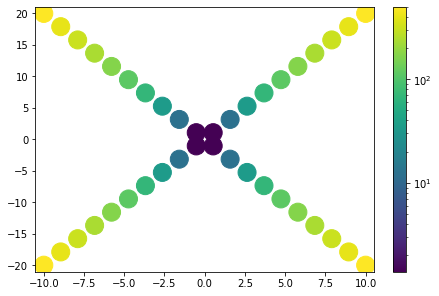

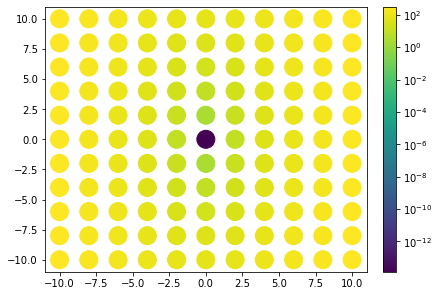

In [15]:
xvalues = np.linspace(-10,10,20)
yvalues = xvalues*2
xx = xvalues
yy = yvalues
xx = np.append(xx,xx)
yy = np.append(yy,-yy)
zz = xx**2+yy**2
f=interpolate.interpolate(xx,yy,zz)
plot.plot2d(xx,yy,xx**2+yy**2,style='scatter',fill_missing=True)

xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-10,10,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f(xx,yy),fill_missing=False,style='scatter')